In [11]:
import numpy as np 
# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

######
# Calculations based on the parameters
eta0 = ((1-m) * vL*vF * b) / (uF * (uL + vL))  # Number of baseline descendants
# gamma = vL * m / uM  # The Gamma parameter of the MS parabola equation
######

# Generate L values
#L_values = np.linspace(0, 100, 1000)
Fs=0 
Ms=1000
L0=0
L_max=K*(1-(1/eta0))

#Ln = np.array(np.arange(-250, L_max, 0.1))  # Discretization of L values
#Males = np.array([(-(eta0 / K) * L**2 + (eta0+delta*vF/(uF*(uF+vF))-(uF+delta)/uF) * L )/((m*vL/uM) * ((uF+delta)/uF-(((uF+delta)*gamma*vF)/(uF*(uF+gamma)*(uF+vF))))) for L in Ln])  # Values of MS along the parabola
#Females_prime=np.array([(-(eta0 / K) * m * (1 - m) * vL**2 * (L**2) * 3 + m * (1 - m) * vL**2 * (eta0 - 1) * L*2 - (Ms * uM * (1 - m) * vL + Fs * uF * m * vL) )/(uM*Ms*uF) for L in Ln])

term1=-(eta0 / K) 
term2= (eta0+delta*vF/(uF*(uF+vF))-(uF+delta)/uF)
term3= - (uM*Ms/(m*vL)) * ((uF+delta)/uF-(((uF+delta)*gamma*vF)/(uF*(uF+gamma)*(uF+vF))))
#term4=-Ms * Fs * uM * uF 
roots = np.roots([term1, term2, term3])
print(roots)

l = []
solution = []
threshold = 1e-5
if Ms==0:
    l=roots
else:
    l.append(0)
    l.append(roots[0])
    l.append(roots[1])

for i in l:
    if i ==0:
        solution.append([0,0,0,0,0])
    else:

        M=m*vL*i/uM
    F=(uL+vL)*i/(b*(1-i/K))
    S=(Ms*(uF+delta))/(M*(uF+delta)) * F
    V=(uF+delta)/(vF)*((M+Ms)/M) * F
    solution.append([i, M, V, F, S])
print(solution)

[986.67204769   2.89265228]
[[0, 0, 0, 0, 0], [986.6720476921959, 3607.519674374591, 300.68263257266307, 1394.1281233770999, 386.45059465096045], [2.8926522835983794, 10.576259911906575, 0.881519148924976, 0.054632063988573266, 5.165537197801787]]


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

# Generate Ms values
Ms_values = np.linspace(0, 500000, 1000)

# Calculate the roots for each Ms value
real_roots = []
solution = []
for Ms in Ms_values:
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    roots = np.roots([term1, term2, term3])
    real_roots.extend([root.real for root in roots if np.isreal(root)])
    
    if Ms==0:
        l = np.zeros(2)
        l=real_roots
    else:
        l = np.zeros(3)
        l[0]=0
        l[1]=real_roots[0]
        l[2]=real_roots[1]
    print(l)
    for i in l:
        if i ==0:
            solution.append([0,0,0,0,0])
        else:

            M=m*vL*i/uM
            F=(uL+vL)*i/(b*(1-i/K))
            S=(Ms*(uF+delta))/(M*(uF+delta)) * F
            V=(uF+delta)/(vF)*((M+Ms)/M) * F
            solution.append([i, M, V, F, S])
print(len(solution))



[989.5646999757943, 0.0]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0.        ]
[  0.         989.56469998   0. 

In [36]:
print( np.zeros(2))


[0. 0.]


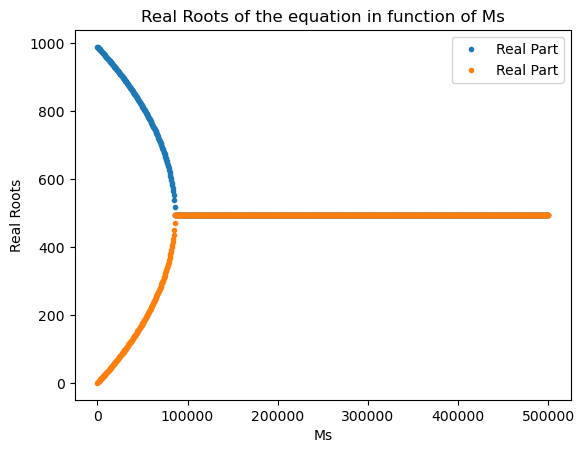

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
# Parameters derived from the literature (see report)
K = 1000  # Carrying capacity
b = 6  # Intrinsic female laying rate per day
m = 0.5  # Sex ratio
vL = 1 / 12.8  # Larvae to adult transfer rate
vF = 1 / 1.5  # Virgin to fertilized transfer rate
uL = -np.log(0.64) / 12.8  # Larval mortality rate
uM = 1 / 93.6  # Male mortality rate
uF = 1 / 79.5  # Female mortality rate
gamma = 0.1
delta = 0.1

# Calculations based on the parameters
eta0 = ((1 - m) * vL * vF * b) / (uF * (uL + vL))  # Number of baseline descendants

# Generate Ms values
Ms_values = np.linspace(0, 500000, 1000)

# Calculate the roots for each Ms value
real_roots = []
for Ms in Ms_values:
    term1 = -(eta0 / K)
    term2 = (eta0 + delta * vF / (uF * (uF + vF)) - (uF + delta) / uF)
    term3 = - (uM * Ms / (m * vL)) * ((uF + delta) / uF - (((uF + delta) * gamma * vF) / (uF * (uF + gamma) * (uF + vF))))
    roots = np.roots([term1, term2, term3])
    real_roots.append(np.real(roots))

# Plot the real roots
plt.figure()
plt.plot(Ms_values, real_roots, '.', label='Real Part')
plt.xlabel('Ms')
plt.ylabel('Real Roots')
plt.title('Real Roots of the equation in function of Ms')
plt.legend()
plt.show()
